<a href="https://colab.research.google.com/github/thiagocdn/Imersao-dados-Alura/blob/main/Aula03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')

provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO", "NU_NOTA_TOTAL"]

In [2]:
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")

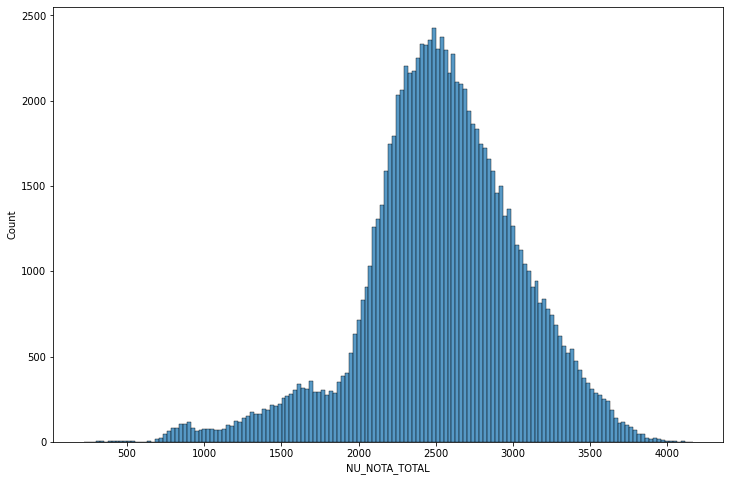

In [4]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL")

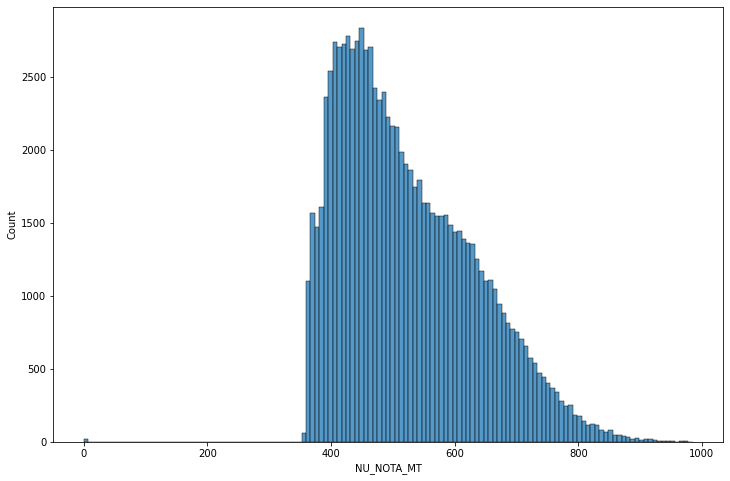

In [5]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_MT")

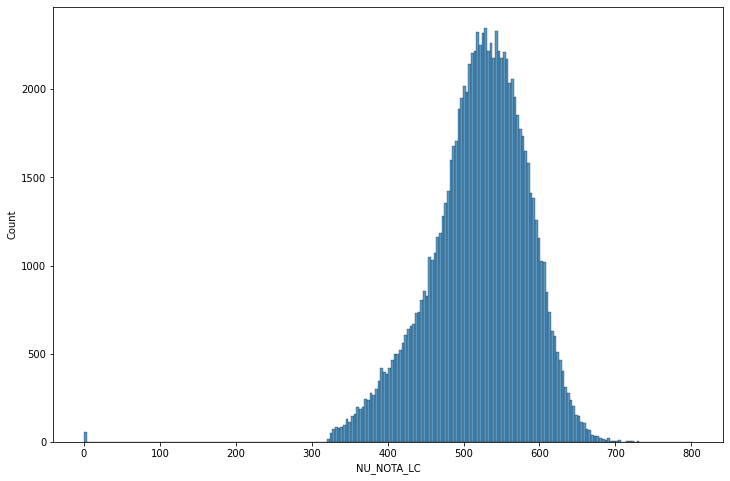

In [6]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_LC")

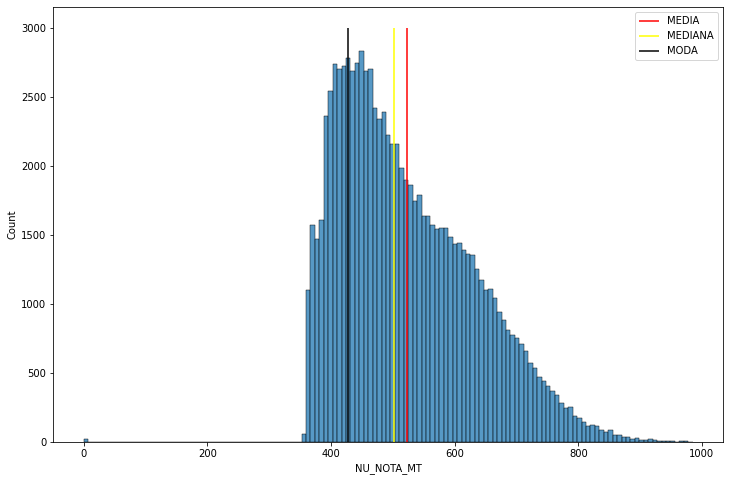

In [61]:
# DESAFIO 01: plotar media, mediana e moda nas notas de LC e MT, pesquisar matplotlib linha vertical
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_MT")
plt.vlines(x=dados_sem_nota_zero["NU_NOTA_MT"].mean(), ymin=0, ymax=3000, label="MEDIA", color="red")
plt.vlines(x=dados_sem_nota_zero["NU_NOTA_MT"].median(), ymin=0, ymax=3000, label="MEDIANA", color="yellow")
plt.vlines(x=dados_sem_nota_zero["NU_NOTA_MT"].mode(), ymin=0, ymax=3000, label="MODA", color="black")
plt.legend()

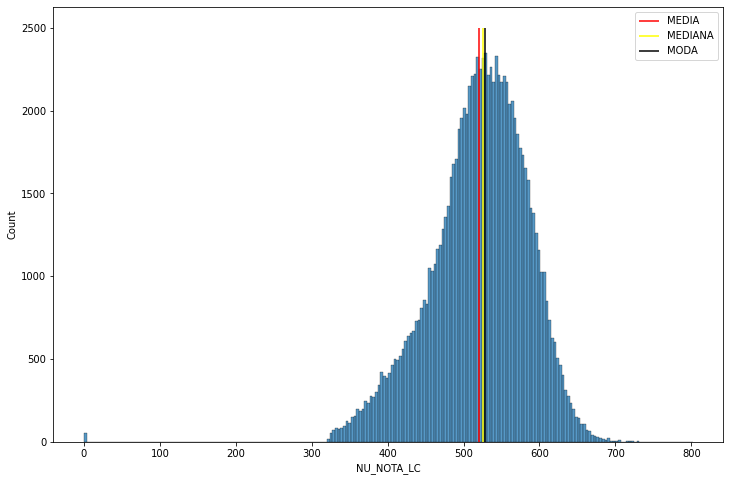

In [64]:
# DESAFIO 01: plotar media, mediana e moda nas notas de LC e MT, pesquisar matplotlib linha vertical
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_LC")
plt.vlines(x=dados_sem_nota_zero["NU_NOTA_LC"].mean(), ymin=0, ymax=2500, label="MEDIA", color="red")
plt.vlines(x=dados_sem_nota_zero["NU_NOTA_LC"].median(), ymin=0, ymax=2500, label="MEDIANA", color="yellow")
plt.vlines(x=dados_sem_nota_zero["NU_NOTA_LC"].mode(), ymin=0, ymax=2500, label="MODA", color="black")
plt.legend()

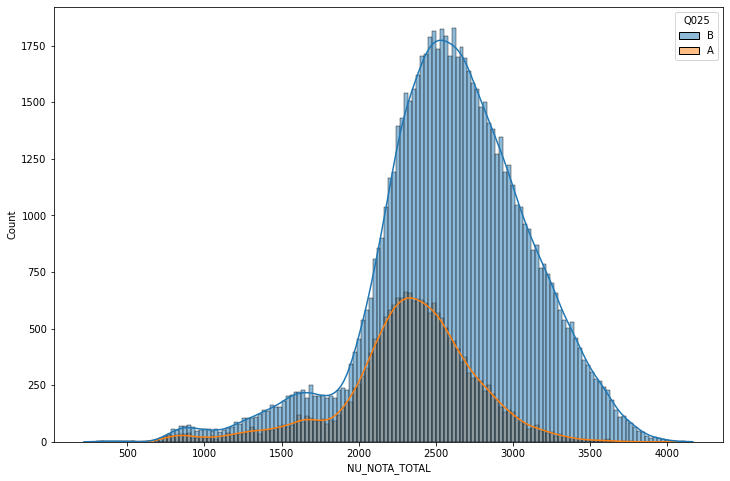

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True)

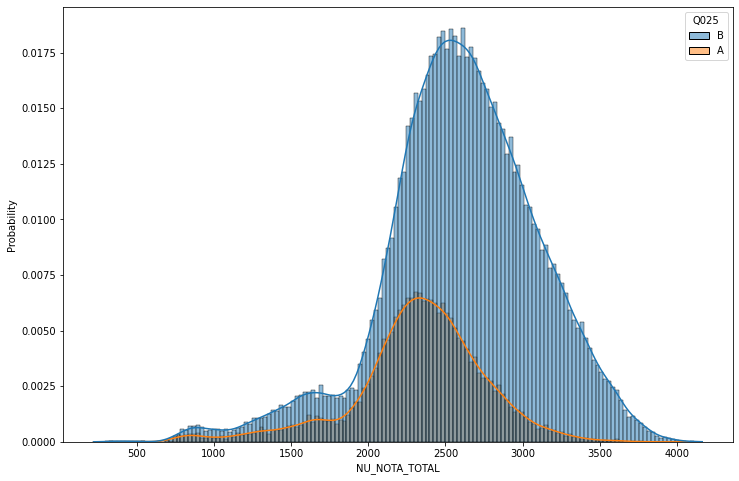

In [11]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

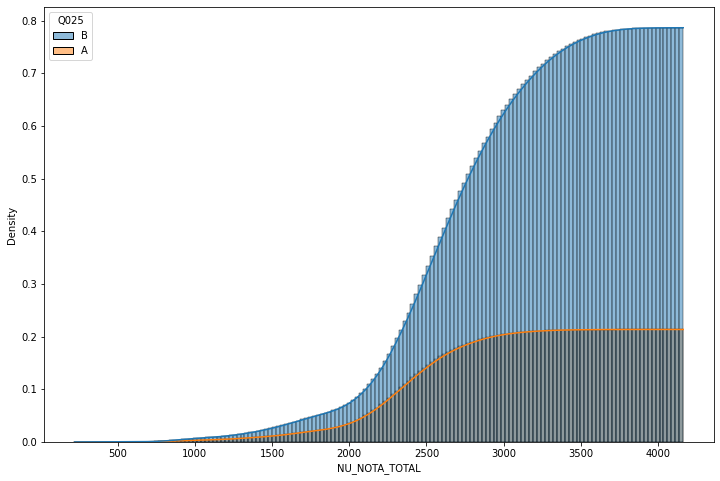

In [13]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_nota_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)

(-50.0, 1050.0)

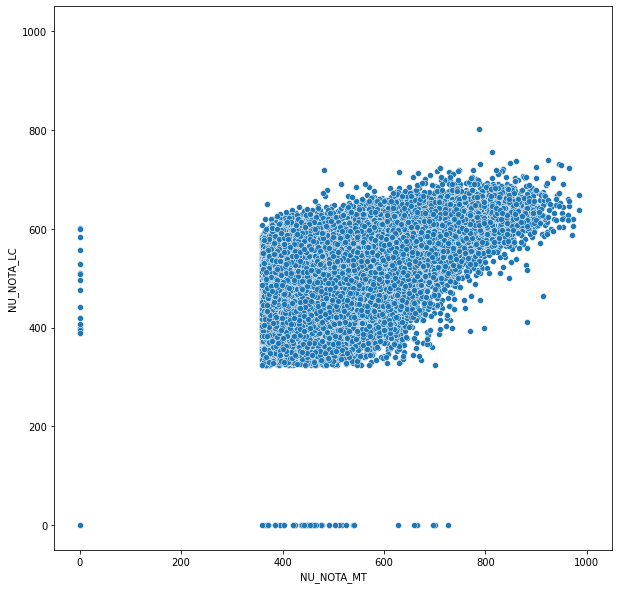

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC")
plt.xlim((-50, 1050,))
plt.ylim((-50, 1050,))

(250.0, 1050.0)

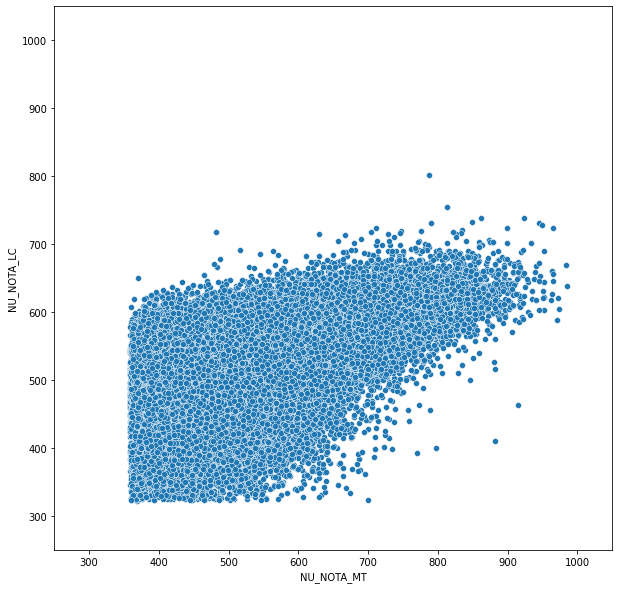

In [18]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados_sem_nota_zero, x="NU_NOTA_MT", y="NU_NOTA_LC")
plt.xlim((250, 1050,))
plt.ylim((250, 1050,))

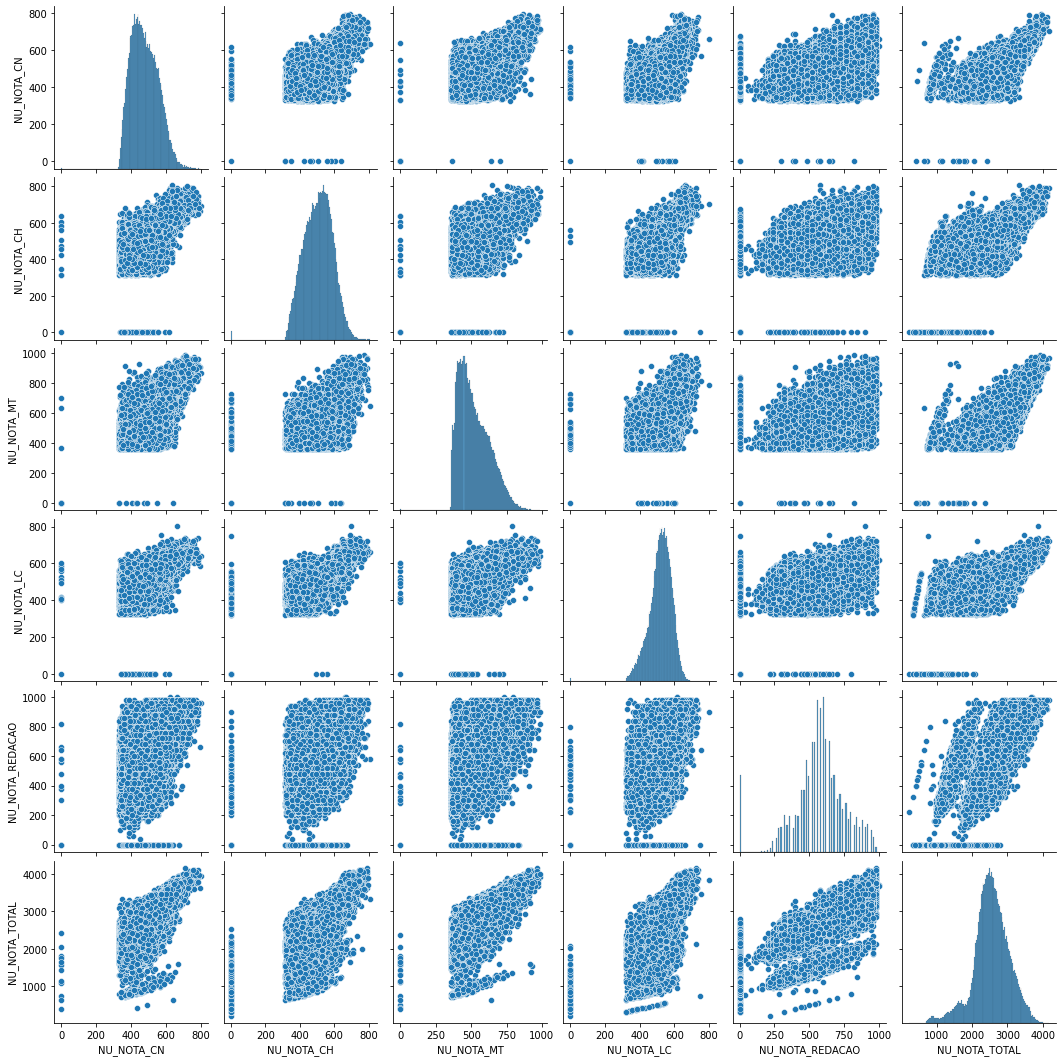

In [22]:
sns.pairplot(dados_sem_nota_zero[provas])

In [25]:
correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


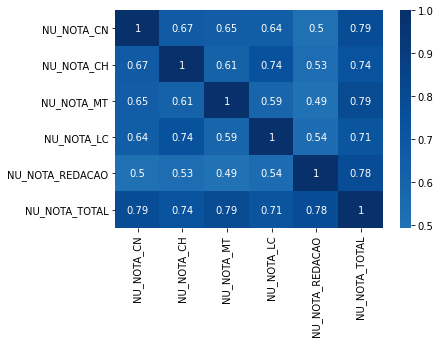

In [27]:
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

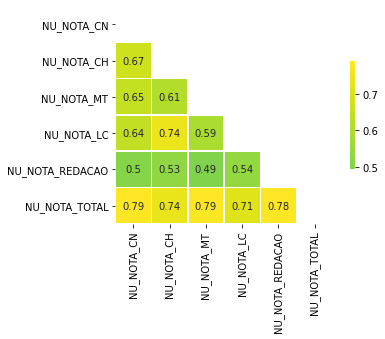

In [99]:
# DESAFIO 02: Melhorar a visualizacao da matriz de correlacao e analisar mais detalhadamente'
import numpy as np
mask = np.triu(np.ones_like(correlacao, dtype=bool))
sns.heatmap(correlacao, cmap="viridis", center=0, square=True, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
# Podemos ver que as notas MT e CN tem uma correlacao maior com a nota total comparando com as notas CH e LC

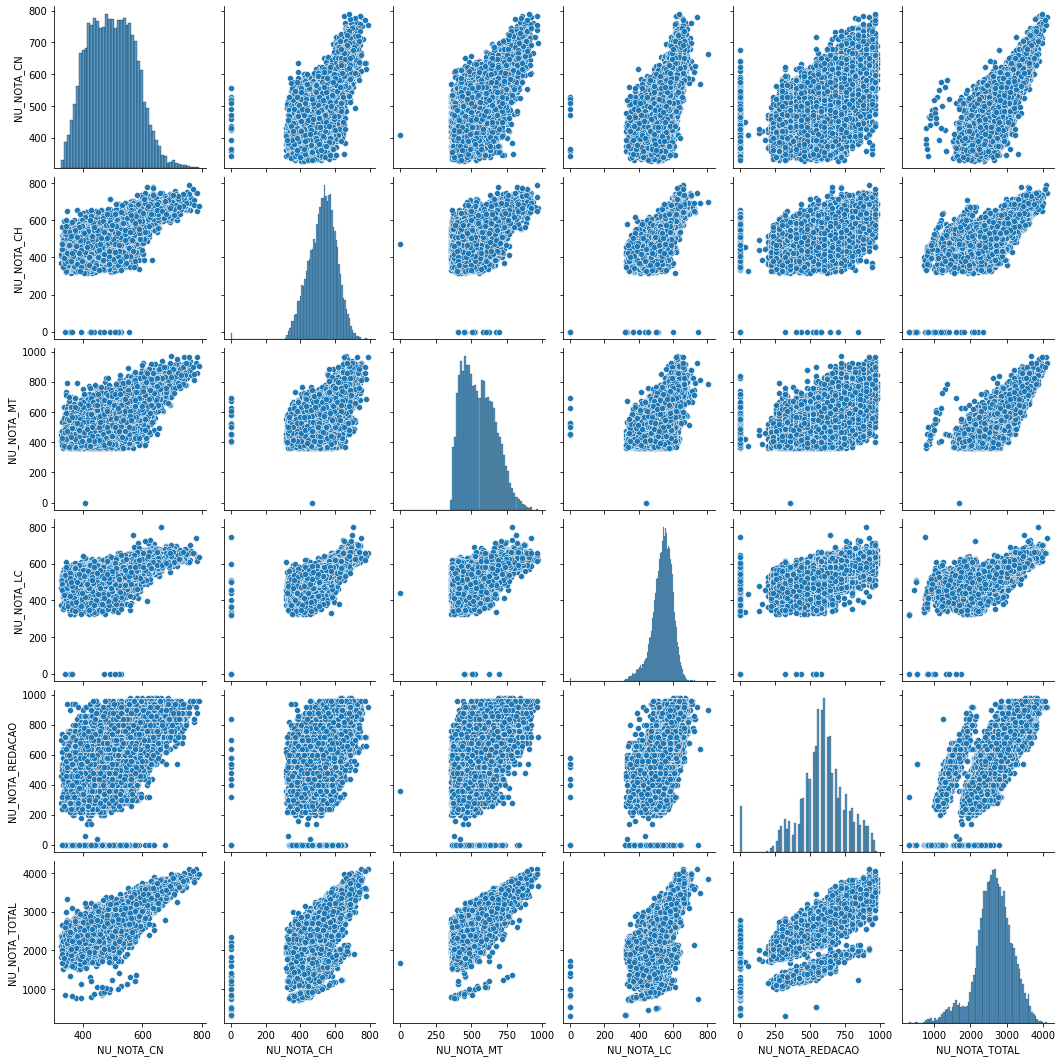

In [92]:
# DESAFIO 03: Filtrar as notas por seu estado ou sua cidade e refazer as analises, verificando se sao semelhantes ao geral
dados_estado_sp = dados_sem_nota_zero.query("SG_UF_RESIDENCIA == 'SP'")
sns.pairplot(dados_estado_sp[provas])

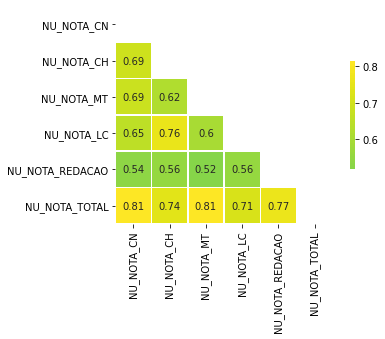

In [98]:
corr_sp = dados_estado_sp[provas].corr()
mask = np.triu(np.ones_like(corr_sp, dtype=bool))
sns.heatmap(corr_sp, cmap="viridis", center=0, square=True, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

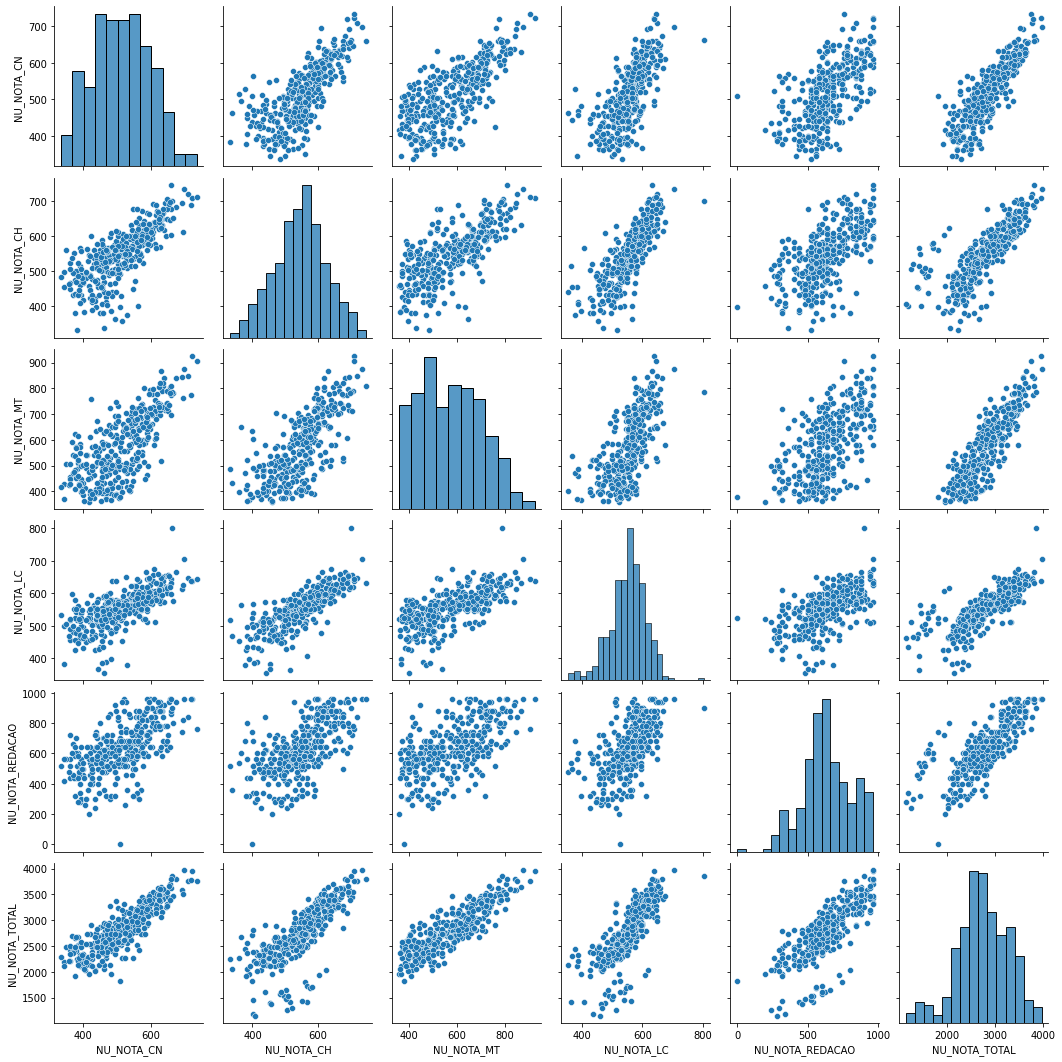

In [93]:
dados_campinas = dados_sem_nota_zero.query("NO_MUNICIPIO_RESIDENCIA == 'Campinas'")
sns.pairplot(dados_campinas[provas])

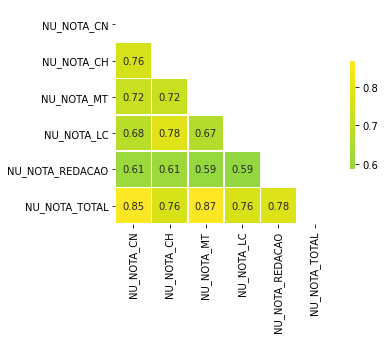

In [97]:
corr_campinas = dados_campinas[provas].corr()
mask = np.triu(np.ones_like(corr_campinas, dtype=bool))
sns.heatmap(corr_campinas, cmap="viridis", center=0, square=True, mask=mask, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Podemos ver que a tendencia de correlacao entre as notas sobem conforme os dados sao filtrados para campinas: Campinas > SP > Brasil

In [ ]:
# DESAFIO 04: Pensar sobre a correlacao entre MT e LC
# Normalmente alunos que tem facilidade em MT tem uma certa facilidade em CN,
# enquanto os que tem facilidade em LC tem mais em CH, podemos ver isso pelas
# correlacoes maiores entre MTxCN e LCxCH que em MTxLC